# Michelin Star Restuarants for New York City and San Francisco

## Imports and Reading in CSVs

In [105]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

%matplotlib inline


In [47]:
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

px.set_mapbox_access_token(map_box_api)

In [107]:
file_path = Path("Data/michelin_star_counts.csv")
all_star_counts = pd.read_csv(file_path)
all_star_counts = all_star_counts.rename(columns = {"Unnamed: 0" : "city"})
all_star_counts.head()

,city,One Star,Two Star,Three Star
0,New York City,55,14,5
1,San Francisco,42,7,6


In [110]:
Total = [74, 55]
all_star_counts["Total"] = Total
all_star_counts

,city,One Star,Two Star,Three Star,Total
0,New York City,55,14,5,74
1,San Francisco,42,7,6,55


In [3]:
file_path = Path("Data/one-star-michelin-restaurants (2)-checkpoint.csv")
one_star_data = pd.read_csv(file_path, index_col='year')
one_star_data.head()

,name,latitude,longitude,city,region,zipCode,cuisine,price,url
year,,,,,,,,,
2019,Kilian Stuba,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,5.0,https://guide.michelin.com/at/en/vorarlberg/kl...
2019,Pfefferschiff,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,5.0,https://guide.michelin.com/at/en/salzburg-regi...
2019,Esszimmer,47.806850,13.03409,Salzburg,Austria,5020,Creative,5.0,https://guide.michelin.com/at/en/salzburg-regi...
2019,Carpe Diem,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,5.0,https://guide.michelin.com/at/en/salzburg-regi...
2019,Edvard,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,4.0,https://guide.michelin.com/at/en/vienna/wien/r...


In [4]:
file_path = Path("Data/two-stars-michelin-restaurants (2)-checkpoint.csv")
two_star_data = pd.read_csv(file_path, index_col= 'year')
two_star_data.head()

,name,latitude,longitude,city,region,zipCode,cuisine,price,url
year,,,,,,,,,
2019,SENNS.Restaurant,47.83636,13.06389,Salzburg,Austria,5020,Creative,5.0,https://guide.michelin.com/at/en/salzburg-regi...
2019,Ikarus,47.79536,13.00695,Salzburg,Austria,5020,Creative,5.0,https://guide.michelin.com/at/en/salzburg-regi...
2019,Mraz & Sohn,48.23129,16.37637,Wien,Austria,1200,Creative,5.0,https://guide.michelin.com/at/en/vienna/wien/r...
2019,Konstantin Filippou,48.21056,16.37996,Wien,Austria,1010,Modern cuisine,5.0,https://guide.michelin.com/at/en/vienna/wien/r...
2019,Silvio Nickol Gourmet Restaurant,48.20558,16.37693,Wien,Austria,1010,Modern cuisine,5.0,https://guide.michelin.com/at/en/vienna/wien/r...


In [5]:
file_path = Path("Data/three-stars-michelin-restaurants (2)-checkpoint.csv")
three_star_data = pd.read_csv(file_path, index_col = 'year')
three_star_data.head()

,name,latitude,longitude,city,region,zipCode,cuisine,price,url
year,,,,,,,,,
2019,Amador,48.25406,16.35915,Wien,Austria,1190,Creative,5.0,https://guide.michelin.com/at/en/vienna/wien/r...
2019,Manresa,37.22761,-121.98071,South San Francisco,California,95030,Contemporary,4.0,https://guide.michelin.com/us/en/california/so...
2019,Benu,37.78521,-122.39876,San Francisco,California,94105,Asian,4.0,https://guide.michelin.com/us/en/california/sa...
2019,Quince,37.79762,-122.40337,San Francisco,California,94133,Contemporary,4.0,https://guide.michelin.com/us/en/california/sa...
2019,Atelier Crenn,37.79835,-122.43586,San Francisco,California,94123,Contemporary,4.0,https://guide.michelin.com/us/en/california/sa...


## NYC One Star Information

In [6]:
nyc_one_star_data = one_star_data.loc[one_star_data['city'] == 'New York']
nyc_one_star_data.head()

,name,latitude,longitude,city,region,zipCode,cuisine,price,url
year,,,,,,,,,
2019,Del Posto,40.743270,-74.00770,New York,New York City,10011,Italian,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,Le Grill de Joël Robuchon,40.742897,-74.00770,New York,New York City,10011,French,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,L'Appart,40.711903,-74.01544,New York,New York City,10281,French,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,Okuda,40.743793,-74.00633,New York,New York City,10011,Japanese,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,Wallsé,40.735380,-74.00814,New York,New York City,10014,Austrian,4.0,https://guide.michelin.com/us/en/new-york-stat...


In [7]:
nyc_one_df = nyc_one_star_data.drop(['latitude', 'longitude', 'zipCode', 'url', 'region'], axis=1)
nyc_one_df = nyc_one_df.set_index('city')
nyc_one_df = nyc_one_df.reset_index()
nyc_one_df['star'] = 1
nyc_one_df.head()

,city,name,cuisine,price,star
0,New York,Del Posto,Italian,4.0,1
1,New York,Le Grill de Joël Robuchon,French,4.0,1
2,New York,L'Appart,French,4.0,1
3,New York,Okuda,Japanese,4.0,1
4,New York,Wallsé,Austrian,4.0,1


In [8]:
nyc_one_df.count()

city       55
name       55
cuisine    55
price      55
star       55
dtype: int64

In [9]:
#nyc_one_df.plot.pie(x= 'cuisine', y= 'price', figsize = (30, 15))

In [10]:
#nyc_one_bar = nyc_one_df.plot.bar(x = 'cuisine', y =)
#nyc_one_bar

In [11]:
nyc_one_df.isnull().sum()

city       0
name       0
cuisine    0
price      0
star       0
dtype: int64

### Location Data

In [78]:
nyc_one_loc = nyc_one_star_data.drop(['cuisine', 'url', 'price', 'region'], axis=1)
nyc_one_loc = nyc_one_loc.set_index('city')
nyc_one_loc = nyc_one_loc.reset_index()
nyc_one_loc['star'] = 1
nyc_one_loc.head()

,city,name,latitude,longitude,zipCode,star
0,New York,Del Posto,40.743270,-74.00770,10011,1
1,New York,Le Grill de Joël Robuchon,40.742897,-74.00770,10011,1
2,New York,L'Appart,40.711903,-74.01544,10281,1
3,New York,Okuda,40.743793,-74.00633,10011,1
4,New York,Wallsé,40.735380,-74.00814,10014,1


In [13]:
nyc_one_loc.isnull().sum()

name         0
latitude     0
longitude    0
zipCode      0
dtype: int64

## NYC Two Star Information

In [14]:
nyc_two_star_data = two_star_data.loc[two_star_data['city'] == 'New York']
nyc_two_star_data.head()

,name,latitude,longitude,city,region,zipCode,cuisine,price,url
year,,,,,,,,,
2019,L'Atelier de Joël Robuchon,40.742905,-74.00769,New York,New York City,10011,French,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,Jungsik,40.718685,-74.00911,New York,New York City,10013,Korean,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,Atera,40.716797,-74.00565,New York,New York City,10013,Contemporary,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,Jean-Georges,40.769070,-73.98155,New York,New York City,10023,Contemporary,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,Marea,40.767490,-73.98114,New York,New York City,10019,Seafood,4.0,https://guide.michelin.com/us/en/new-york-stat...


In [77]:
nyc_two_df = nyc_two_star_data.drop(['latitude', 'longitude', 'zipCode', 'url', 'region'], axis=1)
nyc_two_df = nyc_two_df.set_index('city')
nyc_two_df = nyc_two_df.reset_index()
nyc_two_df['star'] = 2
nyc_two_df.head()

,city,name,cuisine,price,star
0,New York,L'Atelier de Joël Robuchon,French,4.0,2
1,New York,Jungsik,Korean,4.0,2
2,New York,Atera,Contemporary,4.0,2
3,New York,Jean-Georges,Contemporary,4.0,2
4,New York,Marea,Seafood,4.0,2


In [16]:
nyc_two_df.count()

city       14
name       14
cuisine    14
price      14
star       14
dtype: int64

### Location Data

In [76]:
nyc_two_loc = nyc_two_star_data.drop(['cuisine', 'url', 'price', 'region'], axis=1)
nyc_two_loc = nyc_two_loc.set_index('city')
nyc_two_loc = nyc_two_loc.reset_index()
nyc_two_loc['star'] = 2
nyc_two_loc.head()

,city,name,latitude,longitude,zipCode,star
0,New York,L'Atelier de Joël Robuchon,40.742905,-74.00769,10011,2
1,New York,Jungsik,40.718685,-74.00911,10013,2
2,New York,Atera,40.716797,-74.00565,10013,2
3,New York,Jean-Georges,40.769070,-73.98155,10023,2
4,New York,Marea,40.767490,-73.98114,10019,2


In [18]:
nyc_two_loc.isnull().sum()

name         0
latitude     0
longitude    0
zipCode      0
dtype: int64

## NYC Three Star Information

In [19]:
nyc_three_star_data = three_star_data.loc[three_star_data['city'] == 'New York']
nyc_three_star_data.head()


,name,latitude,longitude,city,region,zipCode,cuisine,price,url
year,,,,,,,,,
2019,Masa,40.76855,-73.98335,New York,New York City,10019,Japanese,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,Per Se,40.76828,-73.98292,New York,New York City,10019,Contemporary,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,Le Bernardin,40.76177,-73.98223,New York,New York City,10019,Seafood,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,Eleven Madison Park,40.74170,-73.98712,New York,New York City,10010,Contemporary,4.0,https://guide.michelin.com/us/en/new-york-stat...
2019,Chef's Table at Brooklyn Fare,40.68872,-73.98581,New York,New York City,10018,Contemporary,4.0,https://guide.michelin.com/us/en/new-york-stat...


In [20]:
nyc_three_df = nyc_three_star_data.drop(['latitude', 'longitude', 'zipCode', 'url', 'region'], axis=1)
nyc_three_df = nyc_three_df.set_index('city')
nyc_three_df = nyc_three_df.reset_index()
nyc_three_df['star'] = 3
nyc_three_df

,city,name,cuisine,price,star
0,New York,Masa,Japanese,4.0,3
1,New York,Per Se,Contemporary,4.0,3
2,New York,Le Bernardin,Seafood,4.0,3
3,New York,Eleven Madison Park,Contemporary,4.0,3
4,New York,Chef's Table at Brooklyn Fare,Contemporary,4.0,3


### Location Data

In [81]:
nyc_three_loc = nyc_three_star_data.drop(['cuisine', 'url', 'price', 'region'], axis=1)
nyc_three_loc = nyc_three_loc.set_index('city')
nyc_three_loc = nyc_three_loc.reset_index()
nyc_three_loc['star'] = 3
nyc_three_loc.head()

,city,name,latitude,longitude,zipCode,star
0,New York,Masa,40.76855,-73.98335,10019,3
1,New York,Per Se,40.76828,-73.98292,10019,3
2,New York,Le Bernardin,40.76177,-73.98223,10019,3
3,New York,Eleven Madison Park,40.74170,-73.98712,10010,3
4,New York,Chef's Table at Brooklyn Fare,40.68872,-73.98581,10018,3


# NYC Total Data Frame

In [22]:
nyc_all_count = [
    
]

In [23]:
#nyc_all = pd.concat(nyc_one_df, nyc_two_df, nyc_three_df

In [24]:
#help(nyc_one_df.plot.bar)

In [25]:
#nyc_one_df.plot.bar(x= 'star', figsize = (30, 15))

## SF One Star Information

In [26]:
sf_one_star_data = one_star_data.loc[one_star_data['city'] == 'San Francisco']
sf_one_star_data.head()

,name,latitude,longitude,city,region,zipCode,cuisine,price,url
year,,,,,,,,,
2019,Madera,37.420140,-122.211510,San Francisco,California,94025,Contemporary,3.0,https://guide.michelin.com/us/en/california/sa...
2019,The Village Pub,37.428970,-122.251780,San Francisco,California,94062,Contemporary,3.0,https://guide.michelin.com/us/en/california/sa...
2019,Wakuriya,37.521140,-122.336600,San Francisco,California,94402,Japanese,4.0,https://guide.michelin.com/us/en/california/sa...
2019,Sushi Yoshizumi,37.565075,-122.321100,San Francisco,California,94401,Japanese,4.0,https://guide.michelin.com/us/en/california/sa...
2019,Rasa,37.577522,-122.345985,San Francisco,California,94010,Indian,4.0,https://guide.michelin.com/us/en/california/sa...


In [27]:
sf_one_df = sf_one_star_data.drop(['latitude', 'longitude', 'zipCode', 'url', 'region'], axis=1)
sf_one_df = sf_one_df.set_index('city')
sf_one_df = sf_one_df.reset_index()
sf_one_df['star'] = 1
sf_one_df.head()

,city,name,cuisine,price,star
0,San Francisco,Madera,Contemporary,3.0,1
1,San Francisco,The Village Pub,Contemporary,3.0,1
2,San Francisco,Wakuriya,Japanese,4.0,1
3,San Francisco,Sushi Yoshizumi,Japanese,4.0,1
4,San Francisco,Rasa,Indian,4.0,1


### Location Data

In [92]:
sf_one_loc = sf_one_star_data.drop(['cuisine', 'url', 'price', 'region'], axis=1)
sf_one_loc = sf_one_loc.set_index('city')
sf_one_loc = sf_one_loc.reset_index()
sf_one_loc['star'] = 1
sf_one_loc.head()

,city,name,latitude,longitude,zipCode,star
0,San Francisco,Madera,37.420140,-122.211510,94025,1
1,San Francisco,The Village Pub,37.428970,-122.251780,94062,1
2,San Francisco,Wakuriya,37.521140,-122.336600,94402,1
3,San Francisco,Sushi Yoshizumi,37.565075,-122.321100,94401,1
4,San Francisco,Rasa,37.577522,-122.345985,94010,1


## SF Two Star Information

In [29]:
sf_two_star_data = two_star_data.loc[two_star_data['city'] == 'San Francisco']
sf_two_star_data.head()

,name,latitude,longitude,city,region,zipCode,cuisine,price,url
year,,,,,,,,,
2019,Commis,37.824760,-122.255050,San Francisco,California,94601,Contemporary,4.0,https://guide.michelin.com/us/en/california/sa...
2019,Californios,37.755550,-122.417145,San Francisco,California,94110,Mexican,4.0,https://guide.michelin.com/us/en/california/sa...
2019,Lazy Bear,37.760204,-122.419690,San Francisco,California,94110,Contemporary,4.0,https://guide.michelin.com/us/en/california/sa...
2019,Saison,37.763270,-122.415430,San Francisco,California,94107,Californian,4.0,https://guide.michelin.com/us/en/california/sa...
2019,Campton Place,37.789230,-122.406650,San Francisco,California,94108,Indian,4.0,https://guide.michelin.com/us/en/california/sa...


In [30]:
sf_two_df = sf_two_star_data.drop(['latitude', 'longitude', 'zipCode', 'url', 'region'], axis=1)
sf_two_df = sf_two_df.set_index('city')
sf_two_df = sf_two_df.reset_index()
sf_two_df['star'] = 2
sf_two_df.head()

,city,name,cuisine,price,star
0,San Francisco,Commis,Contemporary,4.0,2
1,San Francisco,Californios,Mexican,4.0,2
2,San Francisco,Lazy Bear,Contemporary,4.0,2
3,San Francisco,Saison,Californian,4.0,2
4,San Francisco,Campton Place,Indian,4.0,2


### Location Data

In [93]:
sf_two_loc = sf_two_star_data.drop(['cuisine', 'url', 'price', 'region'], axis=1)
sf_two_loc = sf_two_loc.set_index('city')
sf_two_loc = sf_two_loc.reset_index()
sf_two_loc['star'] = 2
sf_two_loc.head()

,city,name,latitude,longitude,zipCode,star
0,San Francisco,Commis,37.824760,-122.255050,94601,2
1,San Francisco,Californios,37.755550,-122.417145,94110,2
2,San Francisco,Lazy Bear,37.760204,-122.419690,94110,2
3,San Francisco,Saison,37.763270,-122.415430,94107,2
4,San Francisco,Campton Place,37.789230,-122.406650,94108,2


## SF Three Star Information

In [32]:
sf_three_star_data = three_star_data.loc[three_star_data['city'] == 'San Francisco']
sf_three_star_data.head()

,name,latitude,longitude,city,region,zipCode,cuisine,price,url
year,,,,,,,,,
2019,Benu,37.78521,-122.39876,San Francisco,California,94105,Asian,4.0,https://guide.michelin.com/us/en/california/sa...
2019,Quince,37.79762,-122.40337,San Francisco,California,94133,Contemporary,4.0,https://guide.michelin.com/us/en/california/sa...
2019,Atelier Crenn,37.79835,-122.43586,San Francisco,California,94123,Contemporary,4.0,https://guide.michelin.com/us/en/california/sa...
2019,The French Laundry,38.40443,-122.36474,San Francisco,California,94599,Contemporary,4.0,https://guide.michelin.com/us/en/california/sa...
2019,The Restaurant at Meadowood,38.52025,-122.46479,San Francisco,California,94574,Contemporary,4.0,https://guide.michelin.com/us/en/california/sa...


In [33]:
sf_three_df = sf_three_star_data.drop(['latitude', 'longitude', 'zipCode', 'url', 'region'], axis=1)
sf_three_df = sf_three_df.set_index('city')
sf_three_df = sf_three_df.reset_index()
sf_three_df['star'] = 3
sf_three_df.head()

,city,name,cuisine,price,star
0,San Francisco,Benu,Asian,4.0,3
1,San Francisco,Quince,Contemporary,4.0,3
2,San Francisco,Atelier Crenn,Contemporary,4.0,3
3,San Francisco,The French Laundry,Contemporary,4.0,3
4,San Francisco,The Restaurant at Meadowood,Contemporary,4.0,3


### Location Data

In [94]:
sf_three_loc = sf_three_star_data.drop(['cuisine', 'url', 'price', 'region'], axis=1)
sf_three_loc = sf_three_loc.set_index('city')
sf_three_loc = sf_three_loc.reset_index()
sf_three_loc['star'] = 3
sf_three_loc.head()

,city,name,latitude,longitude,zipCode,star
0,San Francisco,Benu,37.78521,-122.39876,94105,3
1,San Francisco,Quince,37.79762,-122.40337,94133,3
2,San Francisco,Atelier Crenn,37.79835,-122.43586,94123,3
3,San Francisco,The French Laundry,38.40443,-122.36474,94599,3
4,San Francisco,The Restaurant at Meadowood,38.52025,-122.46479,94574,3


# Combined DataFrames

In [89]:
joined_nyc_data = pd.concat([nyc_one_df, nyc_two_df, nyc_three_df], axis = 0)
joined_nyc_data = joined_nyc_data.reset_index()
joined_nyc_data.head()

,index,city,name,cuisine,price,star
0,0,New York,Del Posto,Italian,4.0,1
1,1,New York,Le Grill de Joël Robuchon,French,4.0,1
2,2,New York,L'Appart,French,4.0,1
3,3,New York,Okuda,Japanese,4.0,1
4,4,New York,Wallsé,Austrian,4.0,1


In [88]:
joined_nyc_loc = pd.concat([nyc_one_loc, nyc_two_loc, nyc_three_loc], axis = 0)
joined_nyc_loc = joined_nyc_loc.reset_index()
joined_nyc_loc.head()

,index,city,name,latitude,longitude,zipCode,star
0,0,New York,Del Posto,40.743270,-74.00770,10011,1
1,1,New York,Le Grill de Joël Robuchon,40.742897,-74.00770,10011,1
2,2,New York,L'Appart,40.711903,-74.01544,10281,1
3,3,New York,Okuda,40.743793,-74.00633,10011,1
4,4,New York,Wallsé,40.735380,-74.00814,10014,1


In [90]:
joined_sf_data = pd.concat([sf_one_df, sf_two_df, sf_three_df], axis = 0)
joined_sf_data = joined_sf_data.reset_index()
joined_sf_data.head()

,index,city,name,cuisine,price,star
0,0,San Francisco,Madera,Contemporary,3.0,1
1,1,San Francisco,The Village Pub,Contemporary,3.0,1
2,2,San Francisco,Wakuriya,Japanese,4.0,1
3,3,San Francisco,Sushi Yoshizumi,Japanese,4.0,1
4,4,San Francisco,Rasa,Indian,4.0,1


In [95]:
joined_sf_loc = pd.concat([sf_one_loc, sf_two_loc, sf_three_loc], axis= 0)
joined_sf_loc = joined_sf_loc.reset_index()
joined_sf_loc.head()

,index,city,name,latitude,longitude,zipCode,star
0,0,San Francisco,Madera,37.420140,-122.211510,94025,1
1,1,San Francisco,The Village Pub,37.428970,-122.251780,94062,1
2,2,San Francisco,Wakuriya,37.521140,-122.336600,94402,1
3,3,San Francisco,Sushi Yoshizumi,37.565075,-122.321100,94401,1
4,4,San Francisco,Rasa,37.577522,-122.345985,94010,1


# Graphs

In [109]:
all_count_chart = px.bar(all_star_counts, x = 'Total', color = 'city')
all_count_chart.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['city', 'One Star', 'Two Star', 'Three Star'] but received: Total

In [35]:
nyc_all_counts = all_star_counts.loc[all_star_counts['city'] == 'New York City']
nyc_all_counts.hvplot.bar(xlabel = 'New York City', ylabel = 'Total Restaurants', title = 'New York City Michelin Star Restaurants')

:Bars   [index,Variable]   (value)

In [36]:
sf_all_counts = all_star_counts.loc[all_star_counts['city'] == 'San Francisco']
sf_all_counts.hvplot.bar(xlabel = 'San Francisco', ylabel = 'Total Restaurants', title = 'San Francisco Michelin Star Restaurants')

:Bars   [index,Variable]   (value)

# Maps

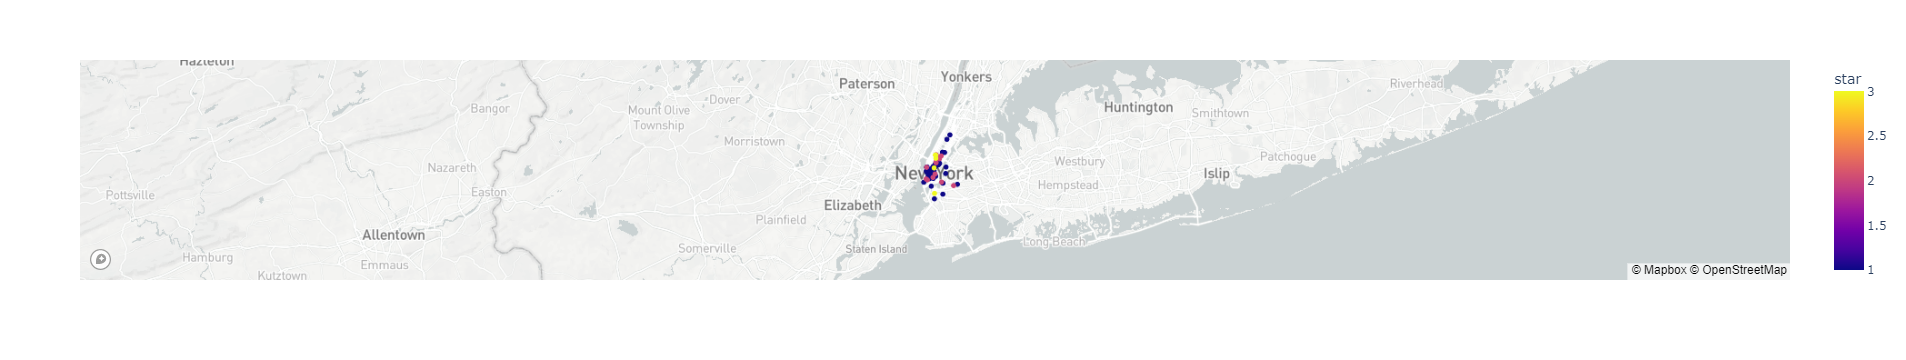

In [102]:
joined_nyc_map = px.scatter_mapbox(
    joined_nyc_loc,
    lat="latitude",
    lon="longitude",
    color="star"
)
joined_nyc_map.show()

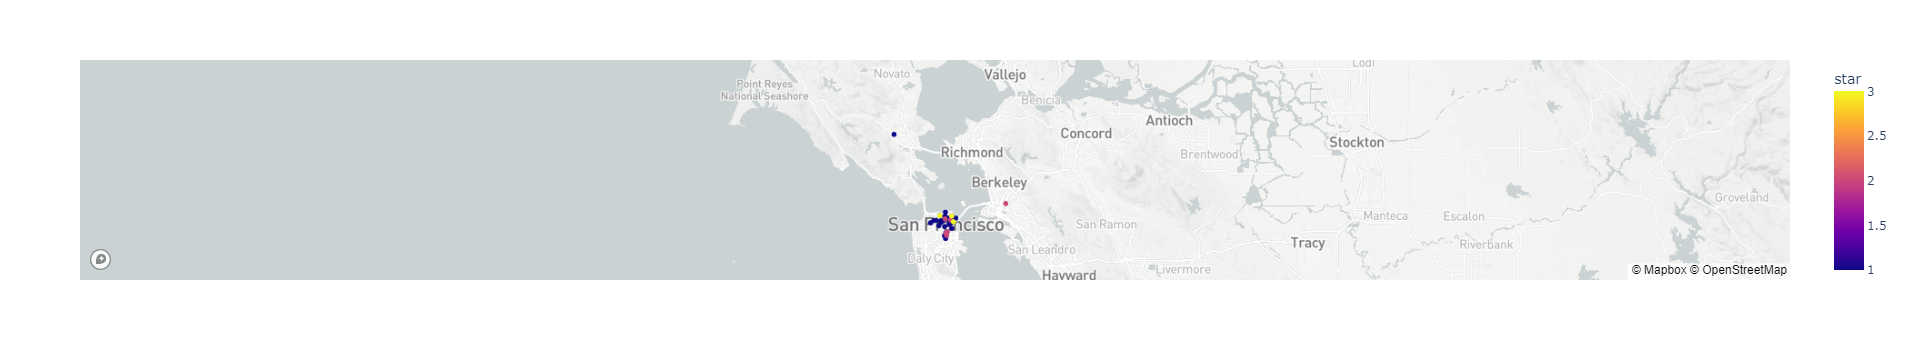

In [97]:
joined_sf_map = px.scatter_mapbox(
    joined_sf_loc,
    lat="latitude",
    lon="longitude",
    color="star",
)
joined_sf_map.show()

C:\Users\alexm\Anaconda\envs\pyvizenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\alexm\Anaconda\envs\pyvizenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\alexm\Anaconda\envs\pyvizenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\alexm\Anaconda\envs\pyvizenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



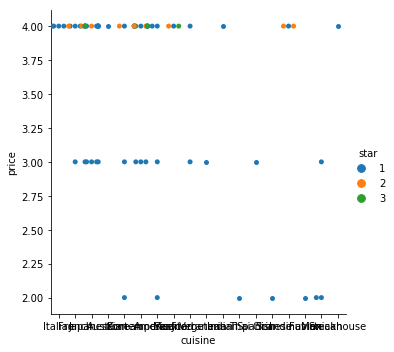

In [73]:
sns.catplot(
    data = joined_nyc_data,
    kind = 'swarm',
    y = 'price',
    x = 'cuisine',
    hue = 'star',
)
